# Notes for Inferential Statistics

<img src="images/notes.png"/>

### Understanding the variability of a point estimate
Suppose the proportion of American adults who support the expansion of solar energy is p = 0:88, which is our parameter of interest. If we were to take a poll of 100 American adults on this topic, the estimate would not be perfect, but how close might we expect the sample proportion in the poll would be to 88%? 

We want to understand, how does the sample proportion p^ behave when the true population proportion is 0.88. We can simulate responses we would get from a simple random sample of 100 American adults, which is only possible because we know the
actual support for expanding solar energy is 0.88. Here’s how we might go about constructing such
a simulation:

    1. There were about 250 million American adults in 2018. On 250 thousands pieces of paper, write "support" on 88% of them and "not" on the other 12%.
    2. Mix up the pieces of paper and pull out 100 pieces to represent our sample of 100 American adults.
    3. Compute the fraction of the sample that say "support".

In [1]:
# 1. Create a set of 250 thousands entries, where 88% of them are "support" and 12% are "not".
pop_size <- 250000
possible_entries <- c(rep("support", 0.88 * pop_size), rep("not", 0.12 * pop_size))

# 2. Sample 100 entries without replacement.
sampled_entries <- sample(possible_entries, size = 100)

# 3. Compute p-hat: count the number that are "support", then divide by the sample size.
sum(sampled_entries == "support") / 100

[1] 0.89

### Normal Density Function

In [2]:
library(ggplot2)

In [3]:
# If we need the height of the IQ distribution for IQ = 100

dnorm(100,m=100,s=15)

[1] 0.02659615

In [4]:
# An aesthetic mapping for the x-axis:  a sequence of 121 numbers, beginning with 40 (4 standard deviations below the mean) 
# to 160 (4 standard deviations above the mean).
x.values <- seq(40,160,1)


# A vector of the nine standard deviation-values from 40 to 160. This figures into the creation of the vertical dashed lines 
# at each standard deviation.
sd.values <- seq(40,160,15)

# A vector of nine zeros.
zeros9 <- rep(0,9)

Because the data is a vector, the first argument is NULL. The aesthetic mapping for the x-axis is the x.values vector.What about the mapping for the y-axis? Well, this is a plot of a normal density function for mean = 100 and sd =15. 

    dnorm(x.values, m=100, s=15)

Here’s the ggplot() statement:

    ggplot(NULL,aes(x=x.values,y=dnorm(x.values,m=100,s=15)))
    
Add a line geom function for the plot and labels for the axes, and here’s what I have:

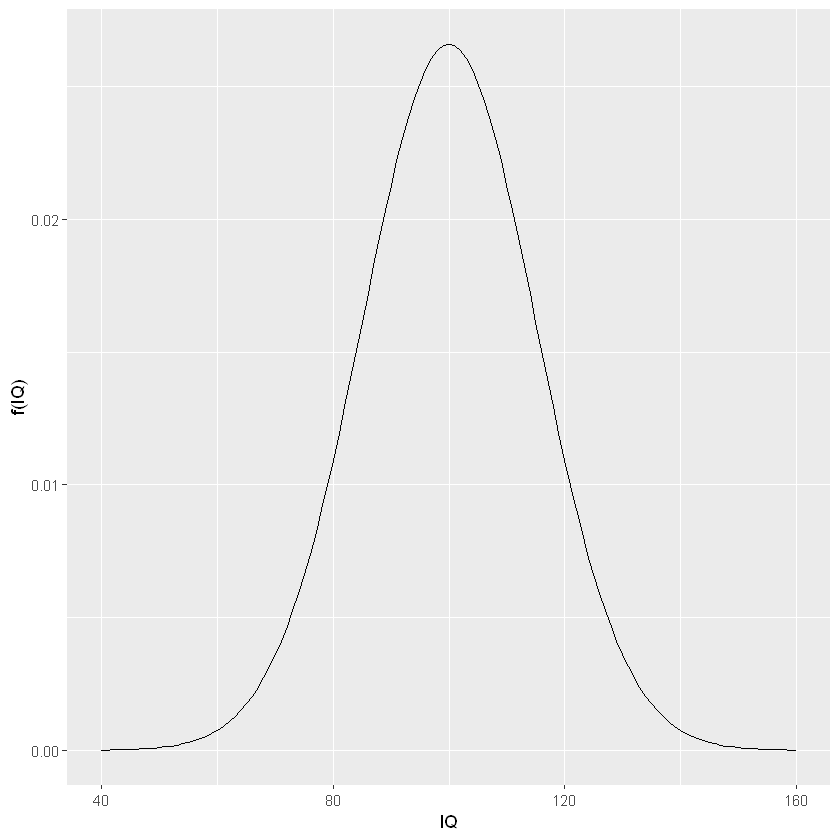

In [5]:
ggplot(NULL,aes(x=x.values,y=dnorm(x.values,m=100,s=15))) +
    geom_line() +
    labs(x="IQ",y="f(IQ)")

To change those values, I use scale_x_continuous() to rescale the x-axis. One of its arguments, breaks, sets the points on the x-axis for the values, and the other, labels, supplies the values. For each one, I supply sd.values:

In [6]:
scale_x_continuous(breaks=sd.values,labels = sd.values)

<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1

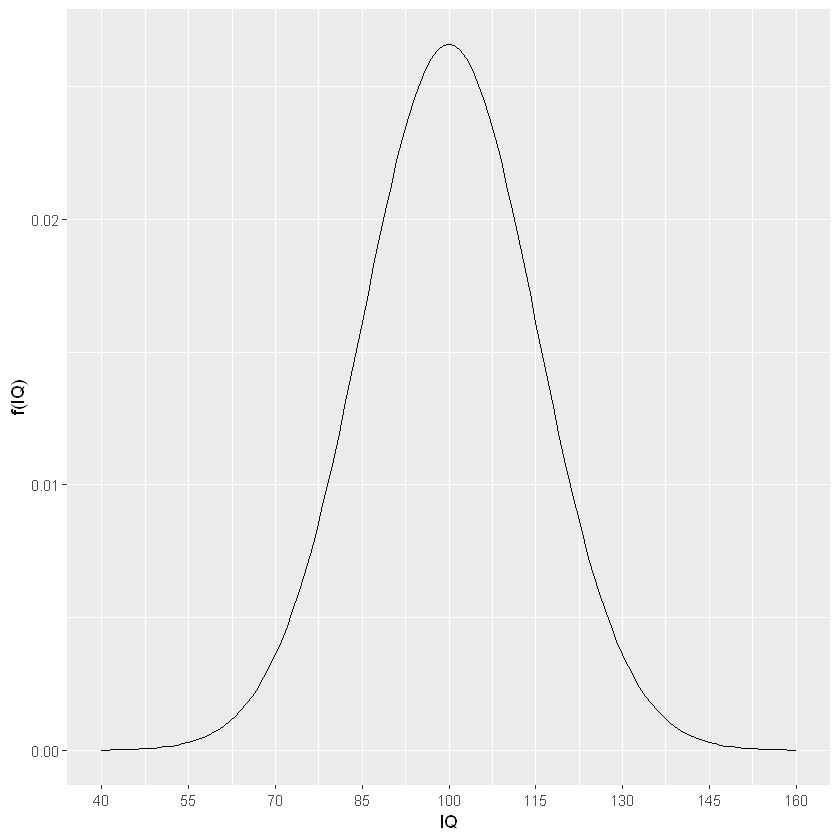

In [7]:
ggplot(NULL,aes(x=x.values,y=dnorm(x.values,m=100,s=15))) +
    geom_line() +
    labs(x="IQ",y="f(IQ)")+
    scale_x_continuous(breaks=sd.values,labels = sd.values)

In ggplot world, vertical lines that start at the x-axis and end at the curve are called segments. So the appropriate geom function to draw them is geom_segment(). This function requires a starting point for each segment and an end point for each segment. I specify those points in an aesthetic mapping within the geom. The x-coordinates for the starting points for the nine segments are in sd.values. The segments start at the x-axis, so the nine y-coordinates are all zeros — which happens to be the contents of the *zeros9 vector*. The segments end at the curve, so the x-coordinates for the end-points are once again, sd.values. The y-coordinates? Those would be *dnorm(sd.values, m=100,s=15)*. Adding a statement about dashed lines, the rather busy geom_segment() statement is

    geom_segment((aes(x=sd.values,y =zeros9, xend = sd.values, yend=dnorm(sd.values,m=100,s=15))), linetype = "dashed")

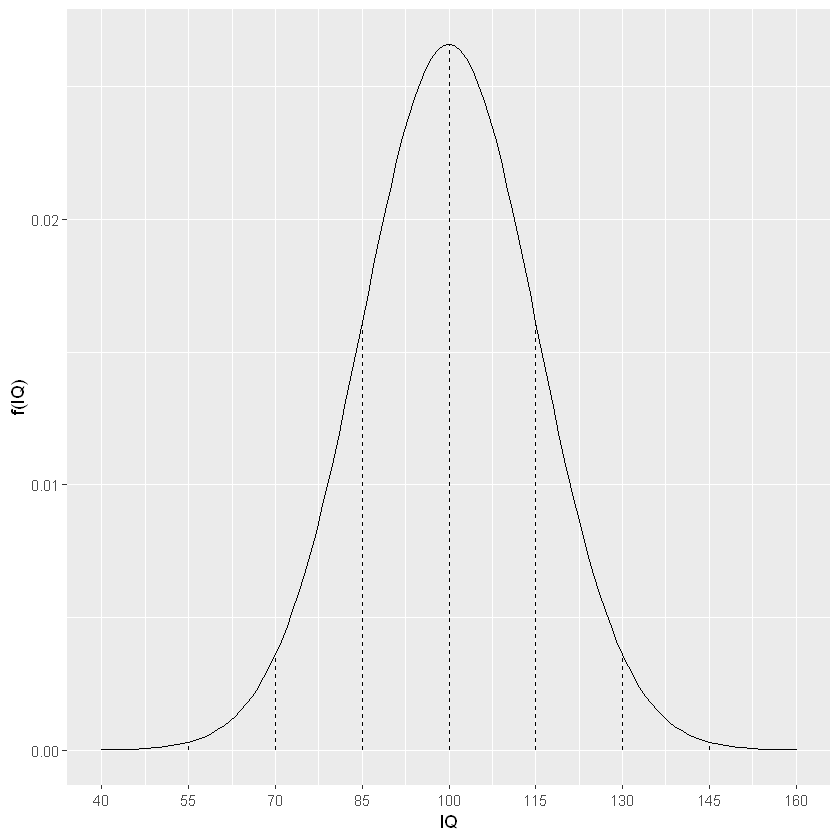

In [8]:
ggplot(NULL,aes(x=x.values,y=dnorm(x.values,m=100,s=15))) +
    geom_line() +
    labs(x="IQ",y="f(IQ)")+
    scale_x_continuous(breaks=sd.values,labels = sd.values) +
    geom_segment((aes(x=sd.values, y=zeros9, xend = sd.values, yend=dnorm(sd.values,m=100,s=15))), linetype = "dashed")

We can use *scale_y_continuous()*, whose expand argument controls the space between the x-values and the x-axis. It’s a two-element vector with defaults that set the amount of space you see in Figure 8-5. Without going too deeply into it, setting that vector to c(0,0) removes the spacing.

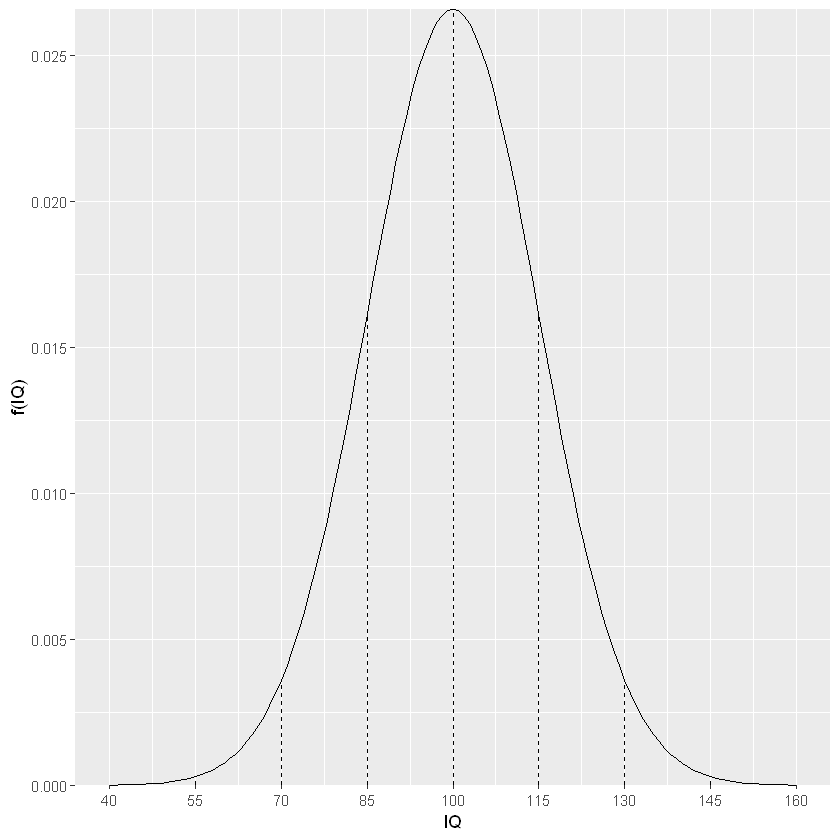

In [9]:
ggplot(NULL,aes(x=x.values,y=dnorm(x.values,m=100,s=15))) +
    geom_line() +
    labs(x="IQ",y="f(IQ)")+
    scale_x_continuous(breaks=sd.values,labels = sd.values) +
    geom_segment((aes(x=sd.values,y=zeros9,xend = sd.values,yend=dnorm(sd.values,m=100,s=15))), linetype = "dashed")+
    scale_y_continuous(expand = c(0,0))

### Cumulative density function
The cumulative density function pnorm(x,m,s) returns the probability of a score less than x in a normal distribution with mean m and standard deviation s.

In [10]:
pnorm(100,m=100,s=15)

[1] 0.5

How about the probability of less than 85?

In [11]:
pnorm(85,m=100,s=15)

[1] 0.1586553

If you want to find the probability of a score greater than 85, pnorm() can handle that, too. It has an argument called lower.tail whose default value, TRUE, returns the probability of “less than.” For “greater than,” set the value to FALSE:

In [12]:
pnorm(85,m=100,s=15, lower.tail = FALSE)

[1] 0.8413447

A function called *pnormGC()* in a terrific package called **tigerstats** helps a lot. The letters GC stand for graphical calculator, but they could also stand for Georgetown College (in Georgetown, Kentucky), the school from which this package originates.

In [13]:
#install.packages("tigerstats")
library(tigerstats)

Loading required package: abd

Loading required package: nlme

Loading required package: lattice

Loading required package: grid

Loading required package: mosaic

Registered S3 method overwritten by 'mosaic':
  method                           from   
  fortify.SpatialPolygonsDataFrame ggplot2


The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.


Attaching package: 'mosaic'


The following objects are masked from 'package:dplyr':

    count, do, tally


The following object is masked from 'package:Matrix':

    mean


The following object is masked from 'package:ggplot2':

    stat


The following objects are masked from 'package:stats':

    binom.test, cor, cor.test, cov, fivenum, IQR, median, prop.test,
    quantile, sd, t.test, var


The following objects are masked from 'package:base':

    max, mean, min, prod, range, sample, sum


Welcome to tigerstats!


[1] 0.3413447

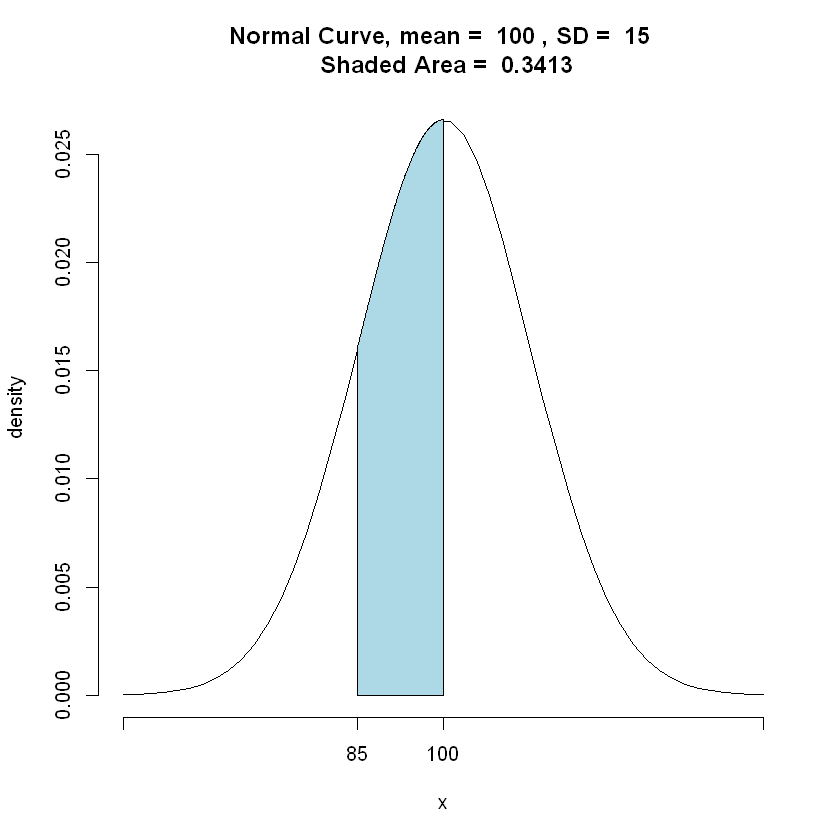

In [14]:
pnormGC(c(85,100),region="between",m=100,s=15,graph=TRUE)

### Plotting the CDF

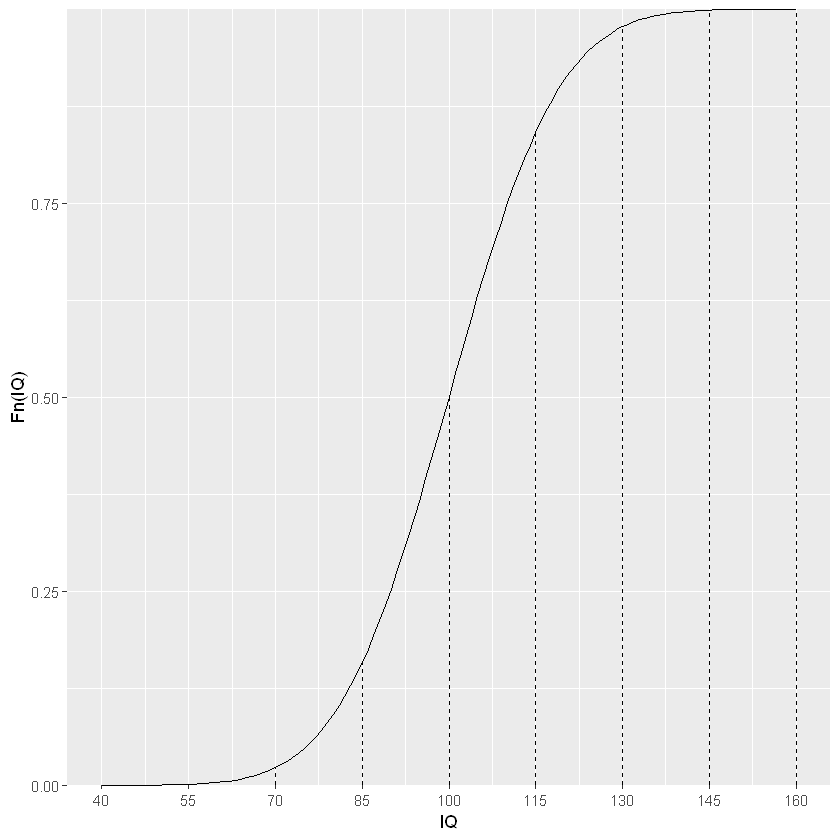

In [15]:
ggplot(NULL,aes(x=x.values,y=pnorm(x.values,m=100,s=15))) +
    geom_line() +
    labs(x="IQ",y="Fn(IQ)")+
    scale_x_continuous(breaks=sd.values,labels = sd.values) +
    geom_segment((aes(x=sd.values,y=zeros9,xend = sd.values,yend=pnorm(sd.values,mean=100,sd=15))), linetype = "dashed")+
    scale_y_continuous(expand=c(0,0))

Yes, all you do is change dnorm to pnorm and edit the y-axis label. Code reuse — it’s a beautiful thing.

### Quantiles of Normal Distributions

The *qnorm()* function is the inverse of *pnorm()*. Give *qnorm()* an area, and it returns the score that cuts off that area (to the left) in the specified normal distribution:

In [16]:
qnorm(0.1586553,m=100,s=15)

[1] 85

The area (to the left), of course, is a percentile. To find a score that cuts off an indicated area to the right:

In [17]:
qnorm(0.1586553,m=100,s=15, lower.tail = FALSE)

[1] 115

Here’s how *qnormGC()* (in the tigerstats package) handles it:

[1] 85

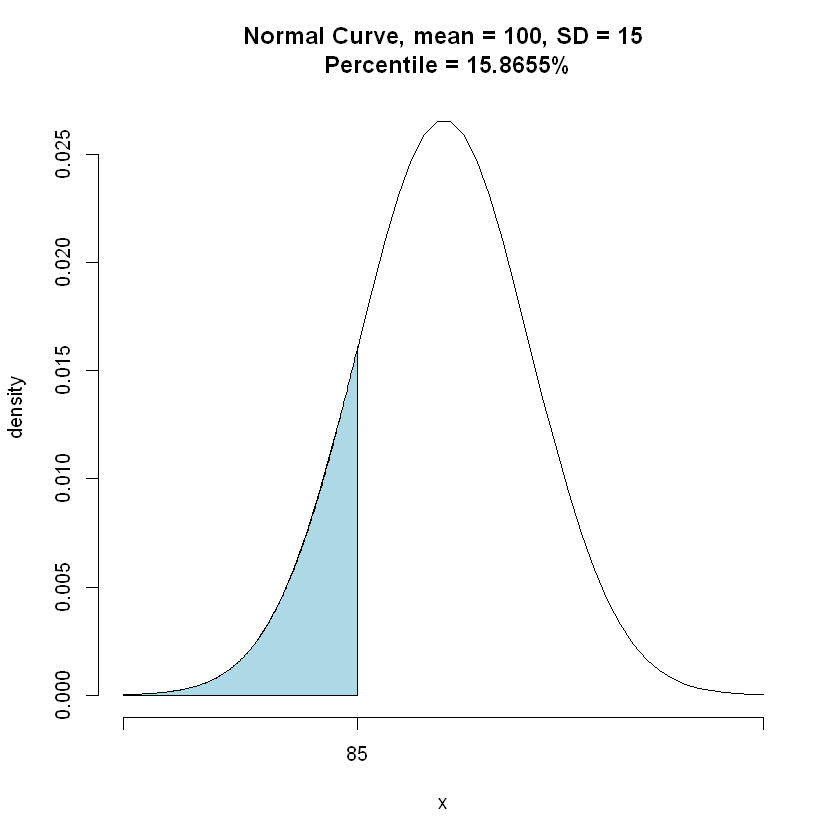

In [18]:
qnormGC(.1586553, region = "below",m=100,s=15, graph=TRUE)

You’re typically not concerned with the 15.86553rd percentile. Usually, it’s quartiles that attract your attention:

In [19]:
 qnorm(c(0,.25,.50,.75,1.00),m=100,s=15)

[1]      -Inf  89.88265 100.00000 110.11735       Inf

The 0th and 100th percentiles (— Infinity and Infinity) show that the cdf never completely touches the x-axis nor reaches an exact maximum. The middle quartiles are of greatest interest, and best if rounded:

In [20]:
round(qnorm(c(.25,.50,.75),m=100,s=15))

[1]  90 100 110

### Plotting the CDF with quartiles

To replace the standard deviation values with the three quartile values, you begin by creating two new vectors:

In [21]:
q.values <-round(qnorm(c(.25,.50,.75),m=100,s=15))

zeros3 <- c(0,0,0)

Now all you have to do is put those vectors in the appropriate places in *scale_x_continuous()* and in *geom_segment()*:

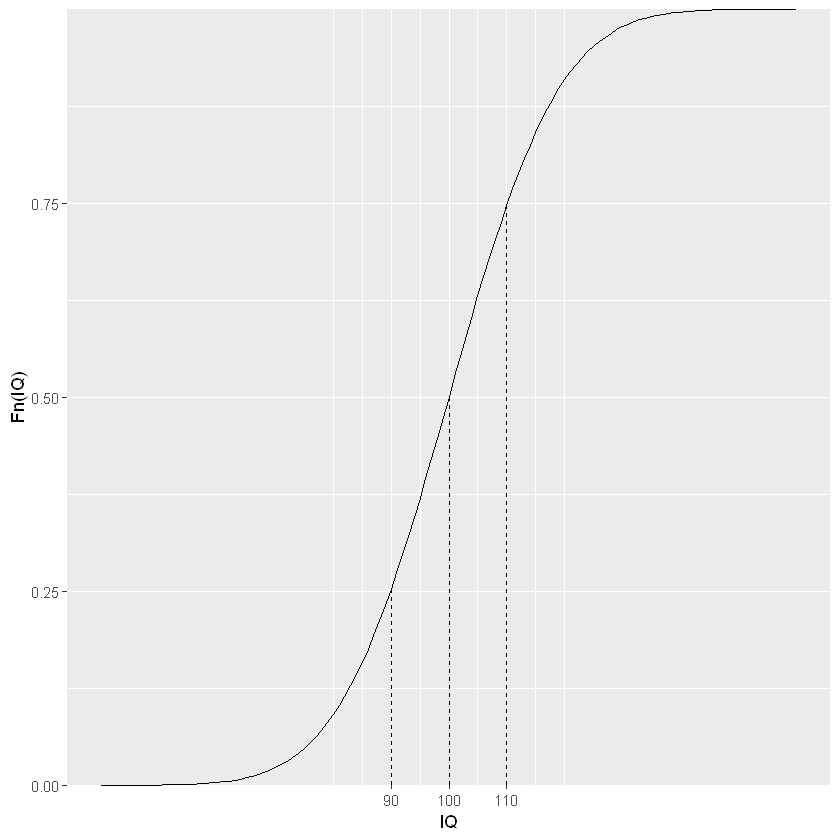

In [22]:
ggplot(NULL,aes(x=x.values,y=pnorm(x.values,m=100,s=15))) +
    geom_line() +
    labs(x="IQ",y="Fn(IQ)")+
    scale_x_continuous(breaks=q.values,labels = q.values) +
    geom_segment((aes(x=q.values,y=zeros3,xend =
    q.values,yend=pnorm(q.values,mean=100,sd=15))),
    linetype = "dashed")+
    scale_y_continuous(expand=c(0,0))

### Random Sampling

The *rnorm()* function generates random numbers from a normal distribution.

Here are five random numbers from the IQ distribution:

In [23]:
rnorm(5,m=100,s=15)

[1] 107.9498 106.0898 114.7365 139.2664 120.6264

In [24]:
rnorm(5,m=100,s=15)

[1] 121.55918  98.89158  82.20109 103.22467  94.11732

Yes, the numbers are all different. (In fact, when you run rnorm(), I can almost guarantee your numbers will be different from mine.) Each time you run the function it generates a new set of random numbers. The randomization process starts with a number called a seed. If you want to reproduce randomization results, use the *set.seed()* function to set the seed to a particular number before randomizing:

In [25]:
set.seed(7637060)

rnorm(5,m=100,s=15)

[1]  71.99120  98.67231  92.68848 103.42207  99.61904

In [26]:
rnorm(5,m=100,s=15)

[1] 113.73382  63.60412  86.47180 121.08474 108.01129

If you set the seed to that same number the next time you randomize, you get the same results:

In [27]:
set.seed(7637060)

rnorm(5,m=100,s=15)

[1]  71.99120  98.67231  92.68848 103.42207  99.61904

### The Standard Normal Distribution in R

Working with the standard normal distribution in R couldn’t be easier. The only change you make to the four norm functions is to not specify a mean and a standard deviation — the defaults are 0 and 1.

In [28]:
dnorm(0)

[1] 0.3989423

In [29]:
pnorm(0)

[1] 0.5

In [30]:
qnorm(c(.25,.50,.75))

[1] -0.6744898  0.0000000  0.6744898

In [31]:
rnorm(5)

[1]  0.9155883 -2.4263919 -0.9018797  1.4056493  0.5340863

    This also applies to the *tigerstats* functions:

In [32]:
pnormGC(c(-1,0),region="between")

[1] 0.3413447

In [33]:
qnormGC(.50, region = "below")

[1] 0

### Plotting the Standard Normal Distribution

In [34]:
z.values <-seq(-4,4,.01)

z.sd.values <- seq(-4,4,1)

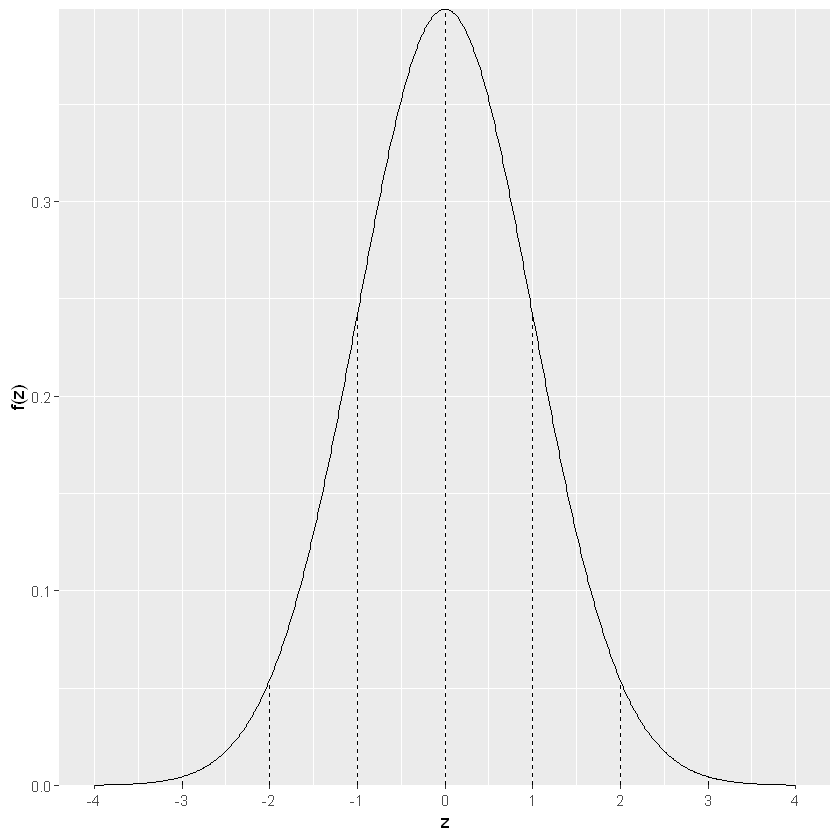

In [35]:
ggplot(NULL,aes(x=z.values,y=dnorm(z.values))) +
    geom_line() +
    labs(x="z",y="f(z)")+
    scale_x_continuous(breaks=z.sd.values,labels=z.sd.values) +
    geom_segment((aes(x=z.sd.values,y=zeros9,xend=z.sd.values,yend=dnorm(z.sd.values))),linetype ="dashed")+
    scale_y_continuous(expand=c(0,0))

## The Central Limit Theorem

In the simulation, you randomly select a score from the population and then randomly select two more. That group of three scores is a sample. Then you calculate the mean of that sample. You repeat this process for a total of 600 samples, resulting in 600 sample means. Finally, you graph the distribution of the sample means.

What does the simulated sampling distribution of the mean look like? I walk you through it in R. You begin by creating a vector for the possible scores, and another for the probability of sampling each score:

In [36]:
values <- c(1,2,3)

probabilities <- c(1/3,1/3,1/3)

In [37]:
# One more vector will hold the 600 sample means:
smpl.means <- NULL

To draw a sample, you use the sample() function:

In [38]:
smpl <-sample(x=values,prob = probabilities, size=3,replace=TRUE)

The first two arguments, of course, provide the scores to sample and the probability of each score. The third is the sample size. The fourth indicates that after you select a score for the sample, you replace it. (You put it back in the population, in
other words.) This procedure (unsurprisingly called “sampling with replacement”) simulates a huge population from which you can select any score at any time.

Each time you draw a sample, you take its mean and append it (add it to the end of) the smpl.means vector:

In [39]:
smpl.means <- append(smpl.means, mean(smpl))

I don’t want you to have to manually repeat this whole process 600 times. Fortunately, like all computer languages, R has a way of handling this: Its for-loop does all the work. To do the sampling, the calculation, and the appending 600 times, the for-loop looks like this:

In [40]:
for(i in 1:600){
    smpl <-sample(x = values,prob = probabilities,
    size = 3,replace=TRUE)
    smpl.means <- append(smpl.means, mean(smpl))
    }

As you can see, the curly brackets enclose what happens in each iteration of the loop, and i is a counter for how many times the loop occurs. If you’d like to run this, here’s all the code preceding the for-loop, including the seed so that you can replicate my results:

In [41]:
values <- c(1,2,3)
probabilities <- c(1/3,1/3,1/3)
smpl.means <- NULL
set.seed(7637060)

In [42]:
for(i in 1:600){
    smpl <-sample(x = values,prob = probabilities,
    size = 3,replace=TRUE)
    smpl.means <- append(smpl.means, mean(smpl))
    }

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



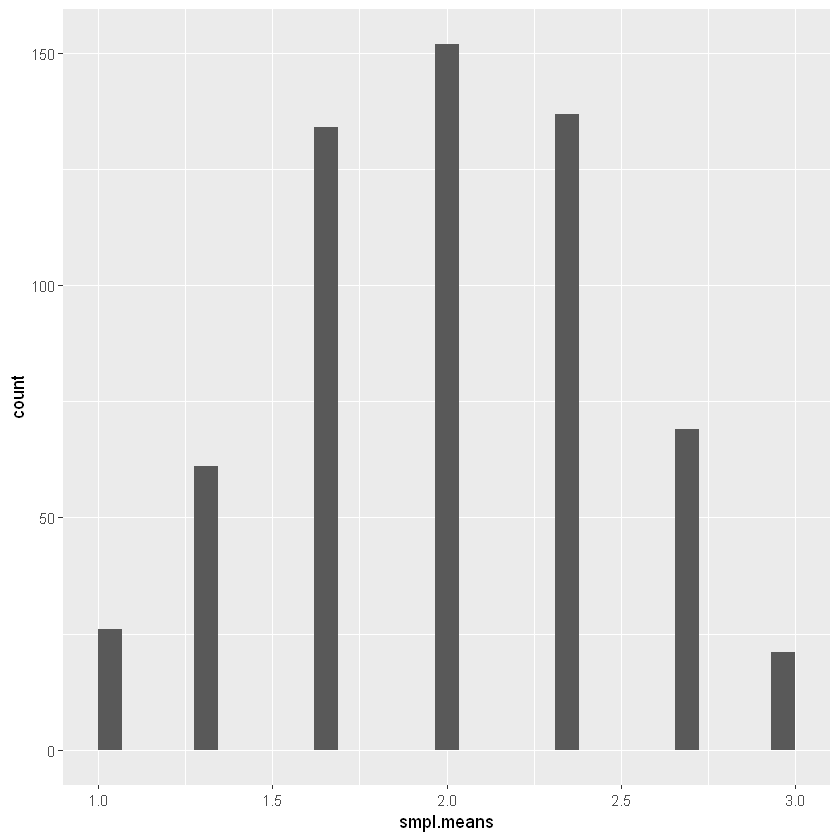

In [43]:
ggplot(NULL,aes(x=smpl.means)) +
    geom_histogram()

Suppose you want the labeled points on the x-axis to reflect the values of the mean in the smpl.means vector. You can’t just specify the vector values for the x-axis, because the vector has 600 of them. Instead, you list the unique values:

In [44]:
unique(smpl.means)

[1] 2.333333 1.666667 1.333333 2.000000 2.666667 3.000000 1.000000

They look better if you round them to two decimal places:

In [45]:
round(unique(smpl.means),2)

[1] 2.33 1.67 1.33 2.00 2.67 3.00 1.00

Finally, you store these values in a vector called m.values, which you’ll use to rescale the x-axis:

In [46]:
# Store these values in a vector called m.values
m.values <-round(unique(smpl.means),2)

# Rescale the x-axis
scale_x_continuous(breaks=m.values,label=m.values)

# Eliminates the space between the x-axis values and the x-axis
scale_y_continuous(expand = c(0,0))

<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1

<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1

In [47]:
# R’s expression syntax to display X as the x-axis label and frequency X as the y-axis label
labs(x=expression(bar(X)),y=expression(frequency(bar(X))))

$x
expression(bar(X))

$y
expression(frequency(bar(X)))

attr(,"class")
[1] "labels"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



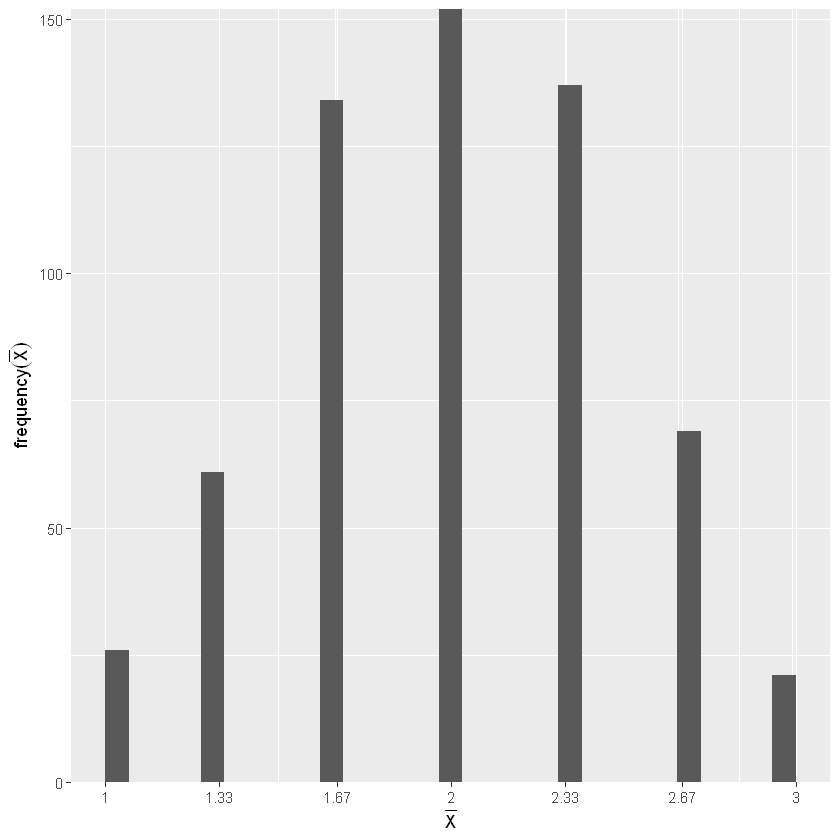

In [48]:
ggplot(NULL,aes(x=smpl.means)) +
    geom_histogram()+
    scale_x_continuous(breaks=m.values,label=m.values)+
    scale_y_continuous(expand = c(0,0)) +
    labs(x=expression(bar(X)),y=expression(frequency(bar(X))))

### Predictions of the Central Limit Theorem

How do the characteristics of the sampling distribution match up with what the
central limit theorem predicts?
To derive the predictions, you have to start with the population. Think of each
population value (1, 2, or 3) as an X, and think of each probability as pr(X). Mathematicians would refer to X as a discrete random variable.
The mean of a discrete random variable is called its expected value. The notation for
the expected value of X is E(X).
To find E(X), you multiply each X by its probability and then add all those products
together. For this example, that’s

$$
E(X) = \sum X (pr(x)) = 1*\frac{1}{3} + 2*\frac{1}{3}  +3*\frac{1}{3} = 2
$$

Or, if you prefer R:

In [49]:
E.values<-sum(values*probabilities)
E.values

[1] 2

To find the variance of X, subtract E(X) from each X, square each deviation, multiply each squared deviation by the probability of X, and add the products. For this
example:
$$
E(X) = \sum (X - E(x))^{2} pr(x) = (1-2)^{2} *\frac{1}{3} + (2-2)^{2} *\frac{1}{3}  +(3-2)^{2} *\frac{1}{3} = 0.6667
$$
In R:

In [50]:
var.values <- sum((values-E.values)^2*probabilities)
var.values

[1] 0.6666667

### Finding confidence limits for a mean

First, the setup:

In [51]:
mean.battery <- 60
sd.battery <- 20
N <- 100
error <- qnorm(.025,lower.tail=FALSE)*sd.battery/sqrt(N)

In [52]:
lower <- mean.battery - error
upper <- mean.battery + error

lower
upper

[1] 56.08007

[1] 63.91993

### The Data
This week we’ll be working with measurements of body dimensions. This data set contains measurements from 247 men and 260 women, most of whom were considered healthy young adults.

In [53]:
download.file("http://www.openintro.org/stat/data/bdims.RData", destfile = "data/bdims.RData")
load("data/bdims.RData")

Let’s take a quick peek at the first few rows of the data.

In [54]:
head(bdims)

,bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,⋯,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt,sex
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<fct>
1,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,⋯,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
2,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,⋯,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
3,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,⋯,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
4,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,⋯,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
5,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,⋯,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
6,43.3,27.0,31.5,19.6,31.3,14.0,11.5,18.8,13.9,119.8,⋯,33.0,28.0,36.6,36.1,23.5,16.9,21,74.8,181.5,1


You’ll see that for every observation we have 25 measurements, but we’ll be focusing on just three columns to get started: weight in kg (wgt), height in cm (hgt), and sex (1 indicates male, 0 indicates female).

Since males and females tend to have different body dimensions, it will be useful to create two additional data sets: one with only men and another with only women.

In [55]:
mdims <- subset(bdims, sex == 1)
fdims <- subset(bdims, sex == 0)

**Make a histogram of men’s heights and a histogram of women’s heights. How would you compare the various aspects of the two distributions?**

In your description of the distributions, did you use words like bell-shaped or normal? It’s tempting to say so when faced with a unimodal symmetric distribution.

To see how accurate that description is, we can plot a normal distribution curve on top of a histogram to see how closely the data follow a normal distribution. This normal curve should have the same mean and standard deviation as the data. We’ll be working with women’s heights, so let’s store them as a separate object and then calculate some statistics that will be referenced later.

In [56]:
fhgtmean <- mean(fdims$hgt)
fhgtsd   <- sd(fdims$hgt)

Next we make a density histogram to use as the backdrop and use the lines function to overlay a normal probability curve. The difference between a frequency histogram and a density histogram is that while in a frequency histogram the heights of the bars add up to the total number of observations, in a density histogram the areas of the bars add up to 1. The area of each bar can be calculated as simply the height times the width of the bar. Using a density histogram allows us to properly overlay a normal distribution curve over the histogram since the curve is a normal probability density function. Frequency and density histograms both display the same exact shape; they only differ in their y-axis. You can verify this by comparing the frequency histogram you constructed earlier and the density histogram created by the commands below.

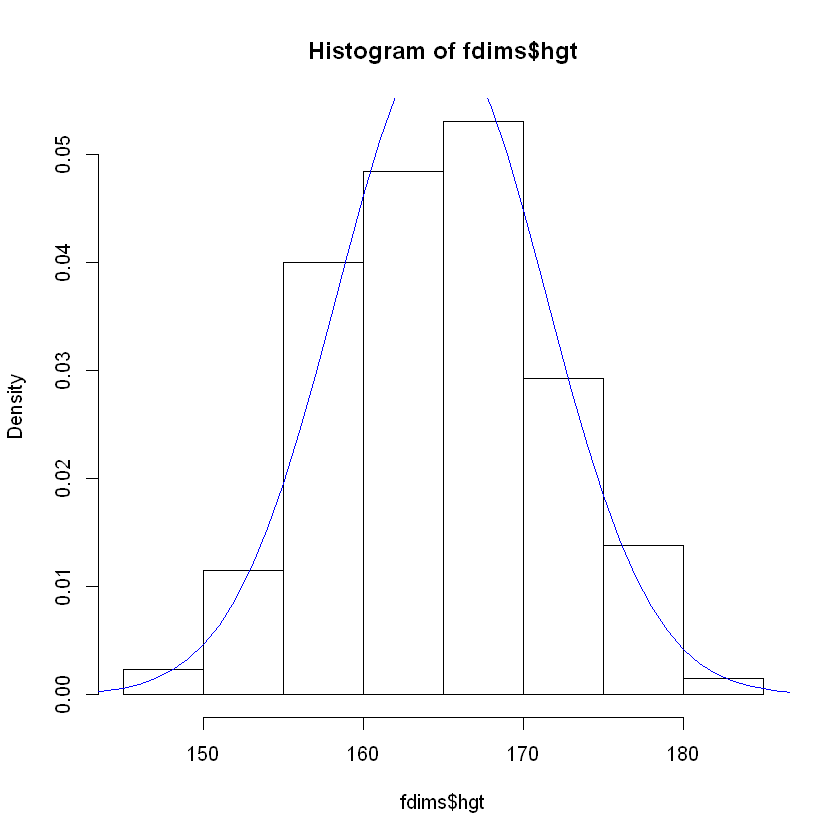

In [57]:
hist(fdims$hgt, probability = TRUE)
x <- 140:190
y <- dnorm(x = x, mean = fhgtmean, sd = fhgtsd)
lines(x = x, y = y, col = "blue")

After plotting the density histogram with the first command, we create the x- and y-coordinates for the normal curve. We chose the x range as 140 to 190 in order to span the entire range of fheight. To create y, we use dnorm to calculate the density of each of those x-values in a distribution that is normal with mean fhgtmean and standard deviation fhgtsd. The final command draws a curve on the existing plot (the density histogram) by connecting each of the points specified by x and y. The argument col simply sets the color for the line to be drawn. If we left it out, the line would be drawn in black.

The top of the curve is cut off because the limits of the x- and y-axes are set to best fit the histogram. To adjust the y-axis you can add a third argument to the histogram function: ylim = c(0, 0.06).

**Based on the this plot, does it appear that the data follow a nearly normal distribution?**

### Evaluating the normal distribution
Eyeballing the shape of the histogram is one way to determine if the data appear to be nearly normally distributed, but it can be frustrating to decide just how close the histogram is to the curve. An alternative approach involves constructing a normal probability plot, also called a normal Q-Q plot for “quantile-quantile”.

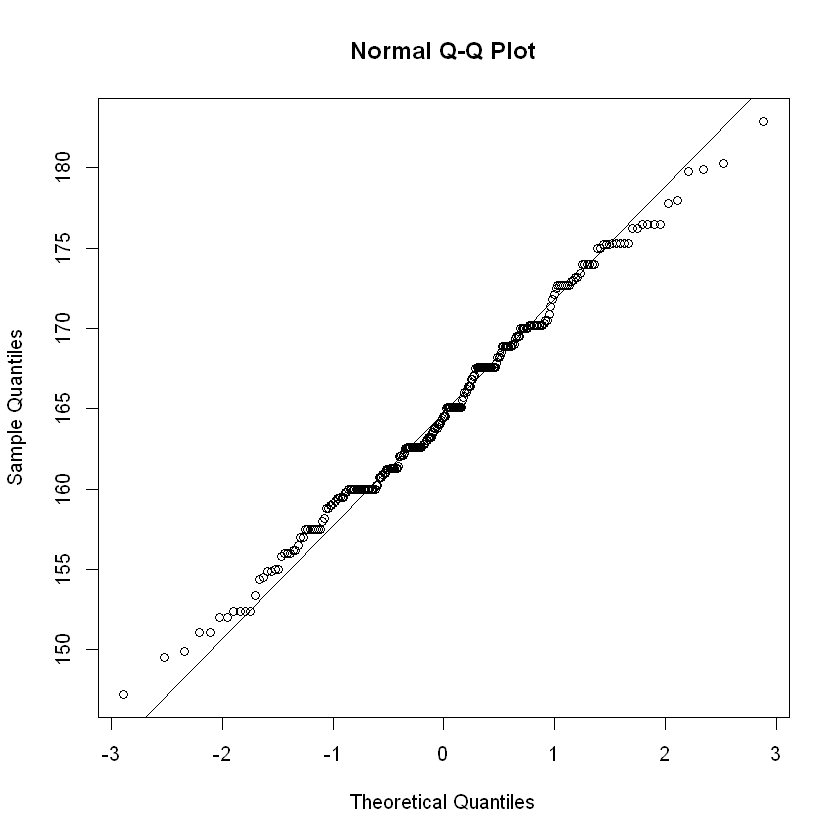

In [58]:
qqnorm(fdims$hgt)
qqline(fdims$hgt)

A data set that is nearly normal will result in a probability plot where the points closely follow the line. Any deviations from normality leads to deviations of these points from the line. The plot for female heights shows points that tend to follow the line but with some errant points towards the tails. We’re left with the same problem that we encountered with the histogram above: how close is close enough?

A useful way to address this question is to rephrase it as: what do probability plots look like for data that I know came from a normal distribution? We can answer this by simulating data from a normal distribution using rnorm.

In [59]:
sim_norm <- rnorm(n = length(fdims$hgt), mean = fhgtmean, sd = fhgtsd)

The first argument indicates how many numbers you’d like to generate, which we specify to be the same number of heights in the fdims data set using the length function. The last two arguments determine the mean and standard deviation of the normal distribution from which the simulated sample will be generated. We can take a look at the shape of our simulated data set, sim_norm, as well as its normal probability plot.

**Make a normal probability plot of sim_norm. Do all of the points fall on the line? How does this plot compare to the probability plot for the real data?**

Even better than comparing the original plot to a single plot generated from a normal distribution is to compare it to many more plots using the following function. It may be helpful to click the zoom button in the plot window.

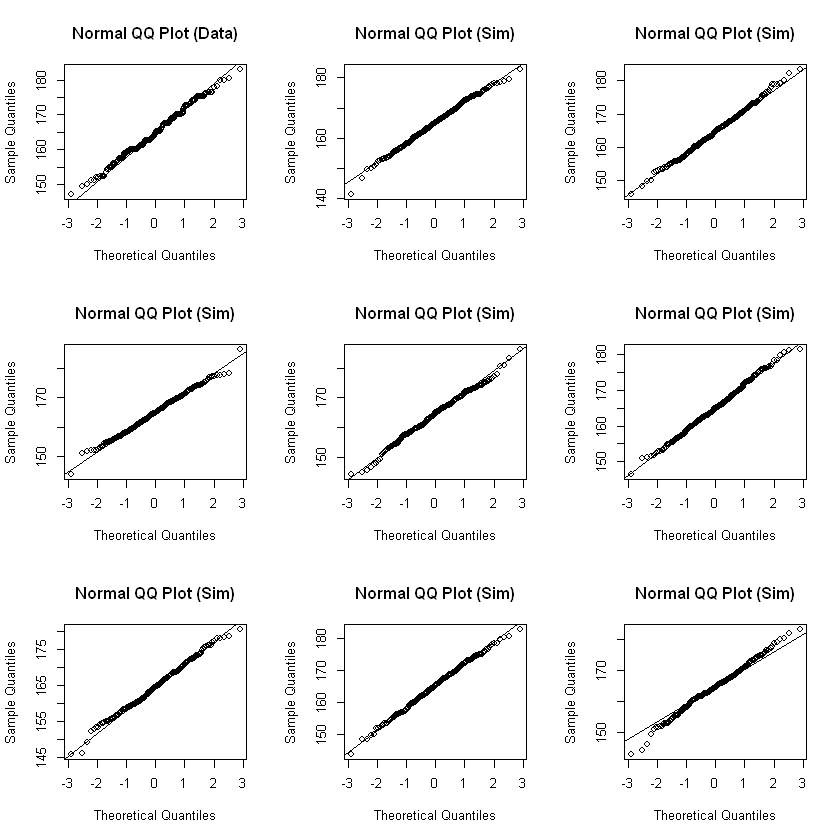

In [60]:
qqnormsim(fdims$hgt)

### Normal probabilities
Okay, so now you have a slew of tools to judge whether or not a variable is normally distributed. Why should we care?

It turns out that statisticians know a lot about the normal distribution. Once we decide that a random variable is approximately normal, we can answer all sorts of questions about that variable related to probability. Take, for example, the question of, “What is the probability that a randomly chosen young adult female is taller than 6 feet (about 182 cm)?” (The study that published this data set is clear to point out that the sample was not random and therefore inference to a general population is not suggested. We do so here only as an exercise.)

If we assume that female heights are normally distributed (a very close approximation is also okay), we can find this probability by calculating a Z score and consulting a Z table (also called a normal probability table). In R, this is done in one step with the function pnorm.

In [61]:
1 - pnorm(q = 182, mean = fhgtmean, sd = fhgtsd)

[1] 0.004434387

Note that the function pnorm gives the area under the normal curve below a given value, q, with a given mean and standard deviation. Since we’re interested in the probability that someone is taller than 182 cm, we have to take one minus that probability.

Assuming a normal distribution has allowed us to calculate a theoretical probability. If we want to calculate the probability empirically, we simply need to determine how many observations fall above 182 then divide this number by the total sample size.

In [62]:
sum(fdims$hgt > 182) / length(fdims$hgt)

[1] 0.003846154

Although the probabilities are not exactly the same, they are reasonably close. The closer that your distribution is to being normal, the more accurate the theoretical probabilities will be.